In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.ticker as ticker

current_font_list = matplotlib.rcParams['font.family']

font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [font]+current_font_list

In [2]:
pd_data = pd.read_csv('../이륜차신고현황_시도별_20230310151721.csv',encoding='cp949',header=1)
pd_data['시점'] = pd_data['시점'].astype(str)
for i,v in enumerate(pd_data['시점']):
    pd_data['시점'][i] = v.split('.')[0]

print(pd_data)

        시점 시도명(1) 시군구(1)   경형    소형    중형    대형
0     2017     부산    강서구  357  2126  2901   158
1     2017     부산    금정구  433  2467  4875   257
2     2017     부산    기장군  300  1554  2694   203
3     2017     부산     남구  531  2984  6744   410
4     2017     부산     동구  277  1059  2741   140
...    ...    ...    ...  ...   ...   ...   ...
1090  2023     부산     서구  206  1480  4031   342
1091  2023     부산    수영구  307  1468  4217   674
1092  2023     부산    연제구  274  1587  4362   645
1093  2023     부산    영도구  216  1480  4331   344
1094  2023     부산   해운대구  537  2924  7902  1332

[1095 rows x 7 columns]


C:\Users\ITPS\AppData\Local\Temp\ipykernel_11136\389249121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_data['시점'][i] = v.split('.')[0]


In [3]:
ple_data=pd.read_csv('../인구_가구_및_주택_–_읍면동_연도_끝자리_0_5___시군구_그_외_연도__20230310170639.csv',encoding='cp949')
ple_data.head()
ple_data.columns=['시군구(1)','시점','총인구']
ple_data.drop([0,1,2,3,4],inplace=True)

In [4]:
ple_data=ple_data.reset_index()
ple_data.drop(['index'],axis=1,inplace=True)

In [18]:
ple_data['시점']=ple_data['시점'].astype(str)

C:\Users\ITPS\AppData\Local\Temp\ipykernel_11136\2367923977.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_motorcycle = g1.sum()
C:\Users\ITPS\AppData\Local\Temp\ipykernel_11136\2367923977.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  a_h=df_motorcycle.pivot('시군구(1)','시점','경형')
C:\Users\ITPS\AppData\Local\Temp\ipykernel_11136\2367923977.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  b_h=df_motorcycle.pivot('시군구(1)','시점','소형')
C:\Users\ITPS\AppData\Local\Temp\ipykernel_11136\2367923977.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  c_h=df_motorcycle.pivot('시군구(1)','시점','중형')
C:\Users\ITPS\AppData\Local\Tem

Text(0.5, 1.0, '대형')

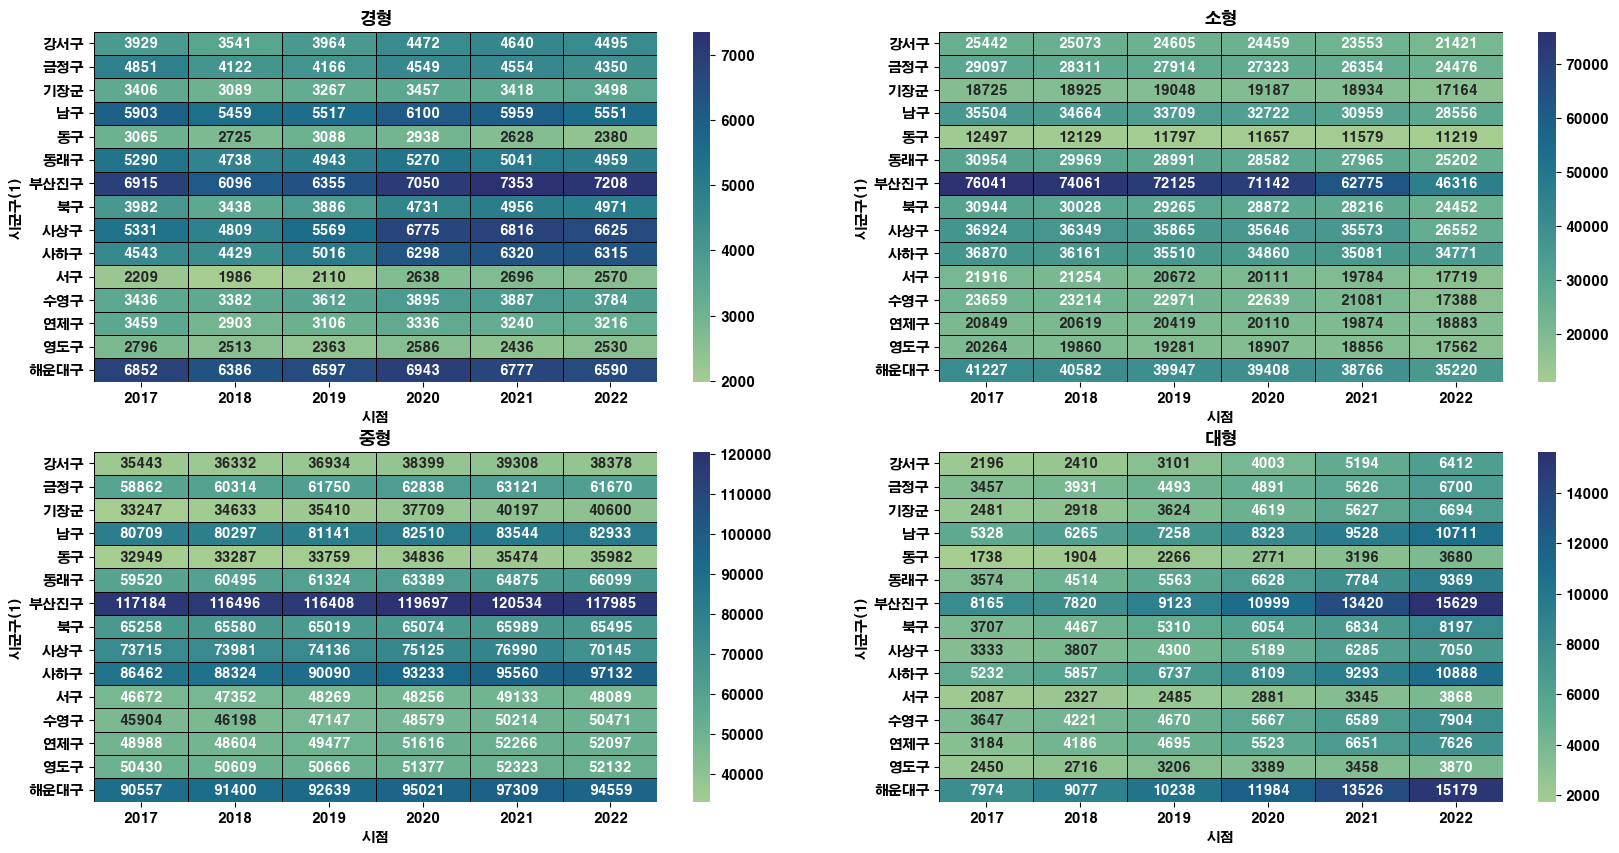

In [5]:
g1 = pd_data.groupby(['시군구(1)','시점'])
sum_motorcycle = g1.sum()
filter1 = sum_motorcycle.reset_index()['시점'] != '2023'
df_motorcycle=sum_motorcycle.reset_index()[filter1]



fig1 = plt.figure(figsize=(20,10))
a = fig1.add_subplot(2,2,1)
b = fig1.add_subplot(2,2,2)
c = fig1.add_subplot(2,2,3)
d = fig1.add_subplot(2,2,4)

a_h=df_motorcycle.pivot('시군구(1)','시점','경형')
b_h=df_motorcycle.pivot('시군구(1)','시점','소형')
c_h=df_motorcycle.pivot('시군구(1)','시점','중형')
d_h=df_motorcycle.pivot('시군구(1)','시점','대형')

sns.heatmap(a_h,linewidths=0.5,annot=True,fmt=".0f",linecolor='black',cmap='crest',ax=a)
sns.heatmap(b_h,linewidths=0.5,annot=True,fmt=".0f",linecolor='black',cmap='crest',ax=b)
sns.heatmap(c_h,linewidths=0.5,annot=True,fmt=".0f",linecolor='black',cmap='crest',ax=c)
sns.heatmap(d_h,linewidths=0.5,annot=True,fmt=".0f",linecolor='black',cmap='crest',ax=d)

a.set_title('경형')
b.set_title('소형')
c.set_title('중형')
d.set_title('대형')

C:\Users\ITPS\AppData\Local\Temp\ipykernel_11136\2713102603.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_sum_data=g2.sum()


<AxesSubplot: xlabel='시점', ylabel='대형'>

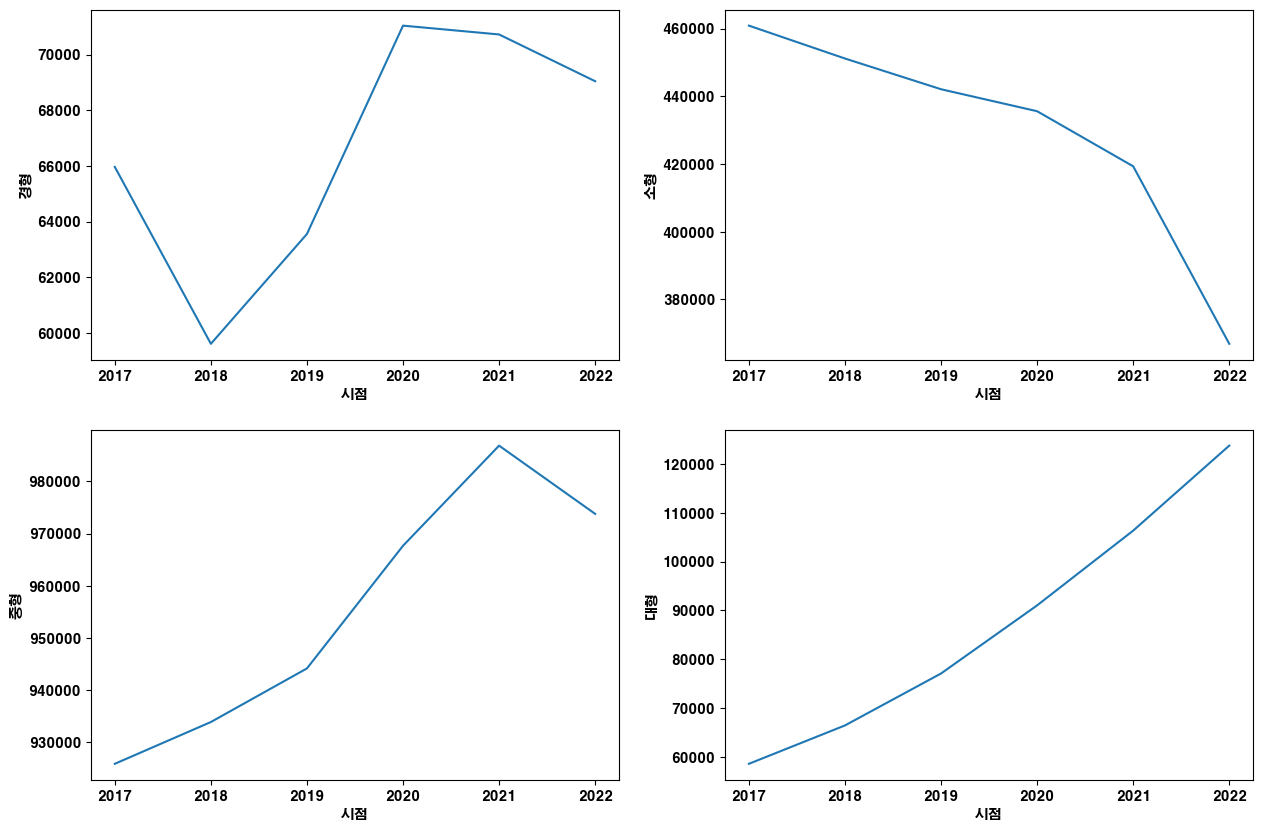

In [6]:
filter1 = pd_data['시점'] != '2023'
df_data=pd_data[filter1]

g2=df_data.groupby(['시도명(1)','시점'])
time_sum_data=g2.sum()

fig1 = plt.figure(figsize=(15,10))
a = fig1.add_subplot(2,2,1)
b = fig1.add_subplot(2,2,2)
c = fig1.add_subplot(2,2,3)
d = fig1.add_subplot(2,2,4)

sns.lineplot(data=time_sum_data.reset_index(),x='시점',y='경형', ax=a)
sns.lineplot(data=time_sum_data.reset_index(),x='시점',y='소형', ax=b)
sns.lineplot(data=time_sum_data.reset_index(),x='시점',y='중형', ax=c)
sns.lineplot(data=time_sum_data.reset_index(),x='시점',y='대형', ax=d)

C:\Users\ITPS\AppData\Local\Temp\ipykernel_11136\2994345741.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_data = g4.sum()


<AxesSubplot: xlabel='시군구(1)', ylabel='대형'>

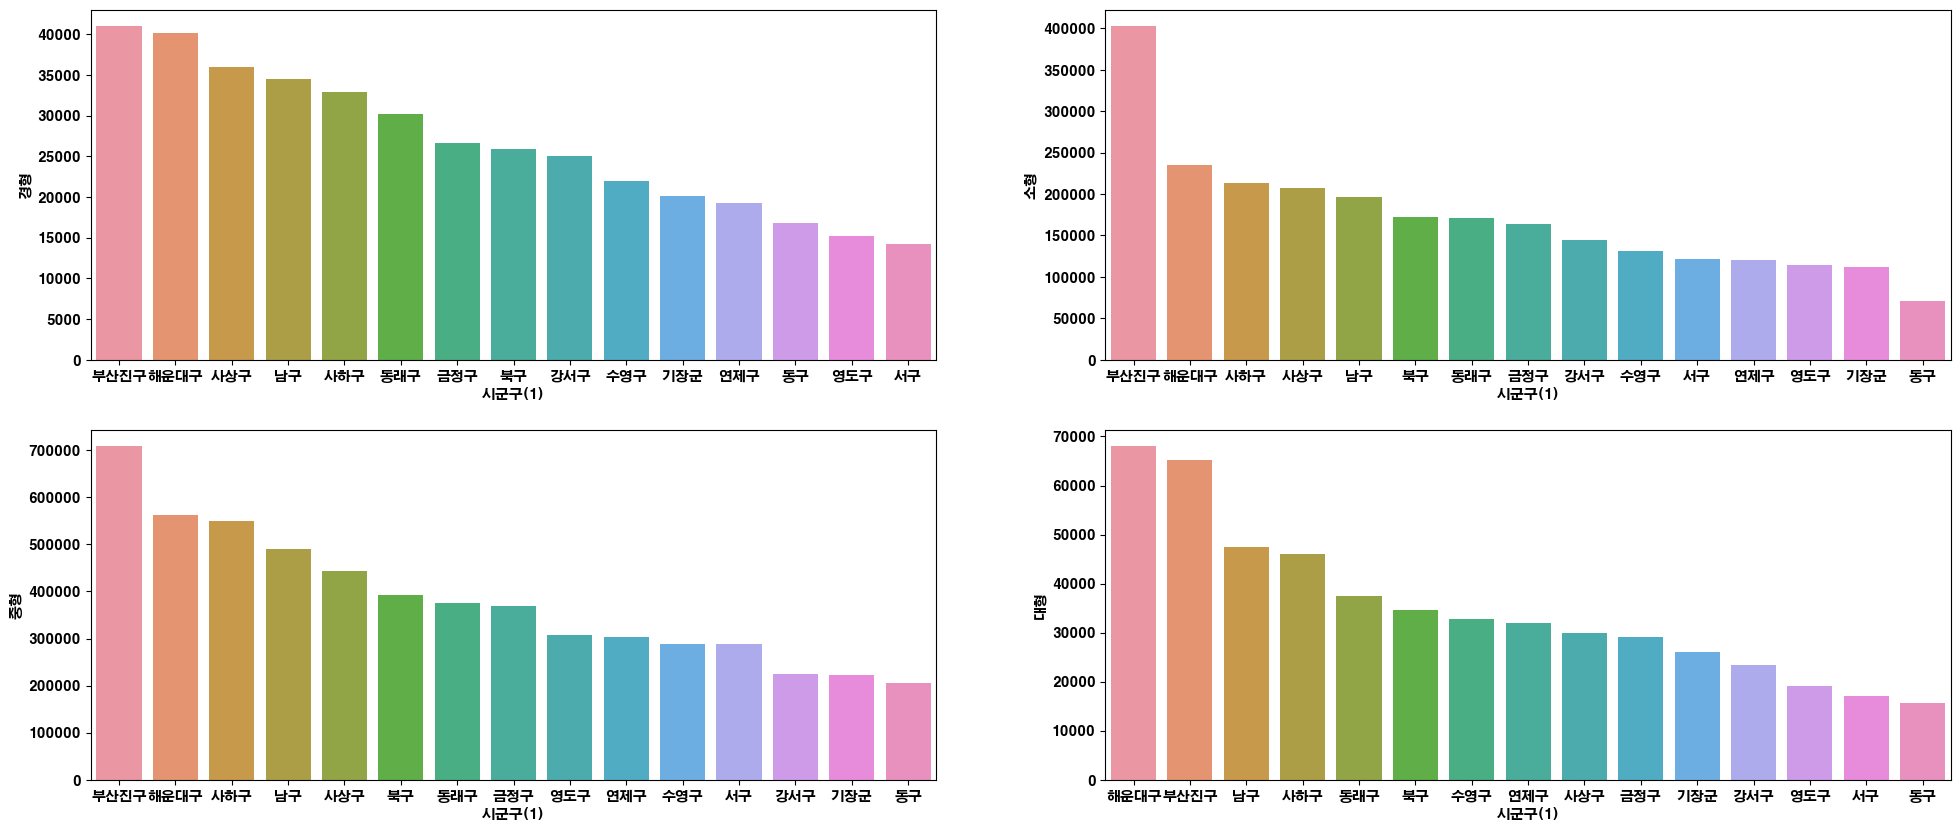

In [26]:
g4=df_motorcycle.groupby('시군구(1)')
city_data = g4.sum()

fig2 = plt.figure(figsize=(6*4,10))
a = fig2.add_subplot(2,2,1)
b = fig2.add_subplot(2,2,2)
c = fig2.add_subplot(2,2,3)
d = fig2.add_subplot(2,2,4)

sns.barplot(data=city_data.reset_index().sort_values(by=['경형'],ascending=False),x='시군구(1)',y='경형',ax=a)
sns.barplot(data=city_data.reset_index().sort_values(by=['소형'],ascending=False),x='시군구(1)',y='소형',ax=b)
sns.barplot(data=city_data.reset_index().sort_values(by=['중형'],ascending=False),x='시군구(1)',y='중형',ax=c)
sns.barplot(data=city_data.reset_index().sort_values(by=['대형'],ascending=False),x='시군구(1)',y='대형',ax=d)

In [35]:
g5 = ple_data.groupby(['시군구(1)']).sum()
p_data=g5.reset_index()
p_data.drop(['시군구(1)'],axis=1,inplace=True)
c_data=city_data.reset_index()
df_combined=pd.concat((c_data,p_data),axis=1)
df_combined

C:\Users\ITPS\AppData\Local\Temp\ipykernel_11136\1628082589.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g5 = ple_data.groupby(['시군구(1)']).sum()


,시군구(1),경형,소형,중형,대형,총인구
0,강서구,25041,144553,224794,23316,645706
1,금정구,26592,163475,368555,29098,1210403
2,기장군,20135,111983,221796,25963,819995
3,남구,34489,196114,491134,47413,1371302
4,동구,16824,70878,206287,15555,429617
5,동래구,30241,171663,375702,37432,1304226
6,부산진구,40977,402460,708304,65156,1779209
7,북구,25964,171777,392415,34569,1433710
8,사상구,35925,206909,444092,29964,1109304
9,사하구,32921,213253,550801,46116,1594623


<AxesSubplot: ylabel='총인구'>

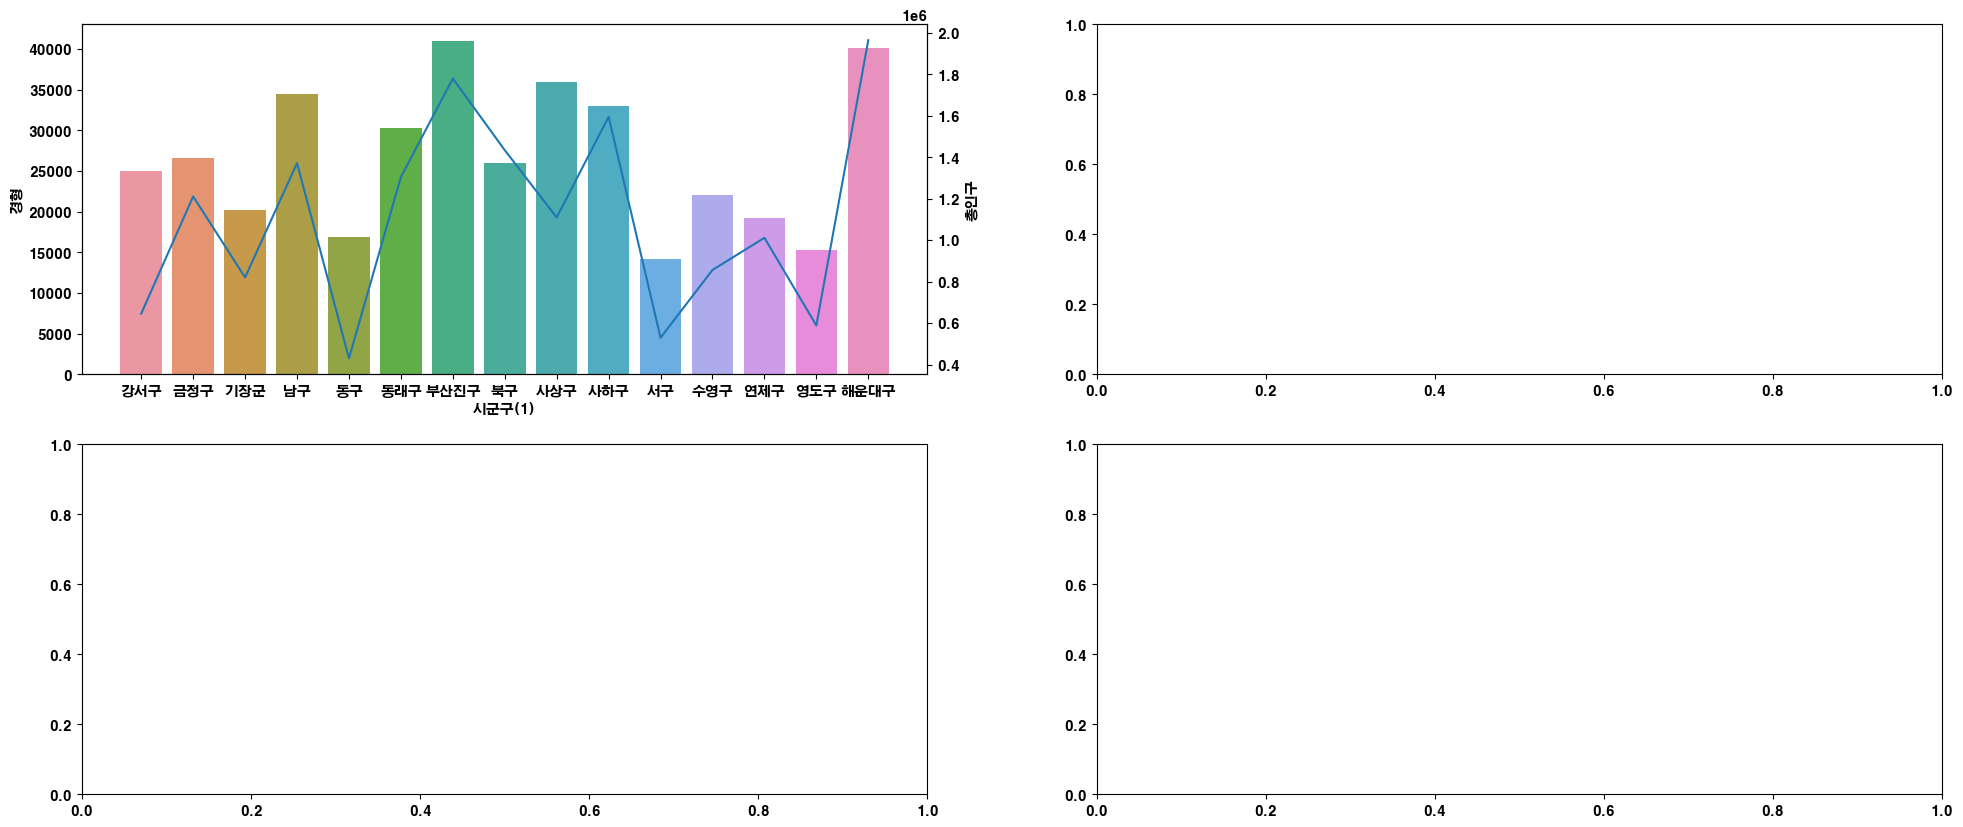

In [41]:
fig3 = plt.figure(figsize=(6*4,10))
a = fig3.add_subplot(2,2,1)
b = fig3.add_subplot(2,2,2)
c = fig3.add_subplot(2,2,3)
d = fig3.add_subplot(2,2,4)
a2=a.twinx()
sns.barplot(data=df_combined, x='시군구(1)',y='경형',ax=a)
sns.lineplot(data=df_combined,x=np.arange(15),y='총인구',ax=a2)